# Exercice 2: Classification d'image à l'aide des réseaux de neurones

## Importation des bibliothèques

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, pandas as pd, numpy as np

## Chargement des données `MNIST`

In [2]:
# - x_train est un tableau contenant les images d'entraînement. Chaque image est représentée sous forme de tableau 
# multidimensionnel. De même pour x_test qui contient les images de test.

# - y_train est un tableau contenant les étiquettes correspondantes des images d'entraînement. Chaque étiquette est une 
# valeur entière qui représente la classe à laquelle appartient l'image. De même pour  y_test contient les étiquettes 
# correspondantes pour les images de test

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Diviser les données en ensembles d'apprentissage et de validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Correspondence des étiquettes

In [3]:
labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

Les étiquettes sont un tableau d'entiers, allant de 0 à 9.
 
| Etiquette       | Description   |
|-----------------|---------------|
| 0               | T-shirt/top   |
| 1               | Trouser       |
| 2               | Pullover      |
| 3               | Dress         |
| 4               | Coat          |
| 5               | Sandal        |
| 6               | Shirt         |
| 7               | Sneaker       |
| 8               | Bag           |
| 9               | Ankle boot    |

## Visualisation des données

In [4]:
print(f"Le jeu d'entrainement contient {x_train.shape[0]} imgaes, chaque image étant représentée en "
      f"{x_train.shape[2]}x{x_train.shape[2]} pixels.")
print(f"De même, il y a {y_train.shape[0]} libellés dans l'ensemble d'apprentissage repartir de la manière suivante: \n")

# Compter le nombre d'images pour chaque étiquette du jeu d'entraînement
y_train_distinct = pd.Series(y_train).value_counts()
for i in range(0, len(y_train_distinct.array)):
    print(f"- {y_train_distinct[i]} images avec l'étiquette {i}")
    
print("\n")
print(f"Le jeu de valdiation contient {x_valid.shape[0]} imgaes, chaque image étant représentée en "
      f"{x_valid.shape[2]}x{x_valid.shape[2]} pixels.")
print(f"De même, il y a {y_valid.shape[0]} libellés dans l'ensemble de validation repartir de la manière suivante: \n")

# Compter le nombre d'images pour chaque étiquette du jeu d'entraînement
y_valid_distinct = pd.Series(y_valid).value_counts()
for i in range(0, len(y_valid_distinct.array)):
    print(f"- {y_valid_distinct[i]} images avec l'étiquette {i}")
    

print("\n")
print(f"Le jeu de test contient {x_test.shape[0]}, chaque image étant représentée en "
      f"{x_test.shape[2]}x{x_test.shape[2]} pixels.")
print(f"De même, il y a {y_test.shape[0]} libellés dans l'ensemble de test repartir de la manière suivante: \n")

# Compter le nombre d'images pour chaque étiquette du jeu de test
y_test_distinct = pd.Series(y_test).value_counts()
for i in range(0, len(y_test_distinct.array)):
    print(f"- {y_test_distinct[i]} images avec l'étiquette {i}")

Le jeu d'entrainement contient 48000 imgaes, chaque image étant représentée en 28x28 pixels.
De même, il y a 48000 libellés dans l'ensemble d'apprentissage repartir de la manière suivante: 

- 4798 images avec l'étiquette 0
- 4781 images avec l'étiquette 1
- 4795 images avec l'étiquette 2
- 4816 images avec l'étiquette 3
- 4798 images avec l'étiquette 4
- 4789 images avec l'étiquette 5
- 4782 images avec l'étiquette 6
- 4841 images avec l'étiquette 7
- 4803 images avec l'étiquette 8
- 4797 images avec l'étiquette 9


Le jeu de valdiation contient 12000 imgaes, chaque image étant représentée en 28x28 pixels.
De même, il y a 12000 libellés dans l'ensemble de validation repartir de la manière suivante: 

- 1202 images avec l'étiquette 0
- 1219 images avec l'étiquette 1
- 1205 images avec l'étiquette 2
- 1184 images avec l'étiquette 3
- 1202 images avec l'étiquette 4
- 1211 images avec l'étiquette 5
- 1218 images avec l'étiquette 6
- 1159 images avec l'étiquette 7
- 1197 images avec l'étiq

### Visualisation des pixels de la première image et son étiquette

#### Les pixels de la 1ère image à l'index 0

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Nous avons un tableau de 28 tableaux, chaque tableau contient 28 éléments de valeurs allant de 0 à 255. Au total nous avons 28x28 = 784 pixels.

#### L'étiquette de la 1ère image à l'index 0

In [6]:
# On recurpère le nom exacte de l'image dans le tableau des étiquettes (labels)
labels[y_train[0]]

'Sneaker'

### Visualisation graphiques de l'image à partir de ses valeurs de pixels

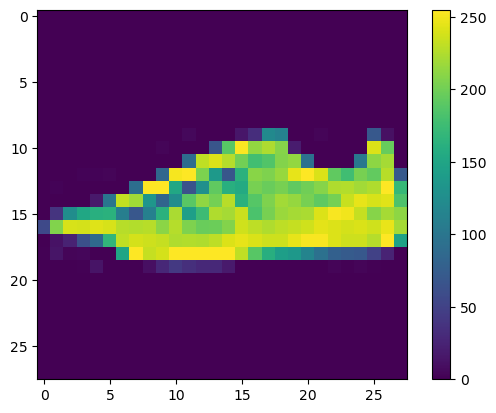

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Prétraitement des données

### Conversion en flottant et normalisation des pixels.

In [8]:
# Cette ligne convertit les valeurs des pixels de l'ensemble d'entraînement en nombres flottants (float32) et les normalise
# en les divisant par 255. La division par 255 permet de ramener les valeurs des pixels dans la plage de 0 à 1.
x_train = x_train.astype('float32') / 255

# Cette ligne fait la même chose que la précédente, mais pour l'ensemble de test x_test.
x_valid = x_valid.astype('float32') / 255

# Cette ligne fait la même chose que la précédente, mais pour l'ensemble de test x_test.
x_test = x_test.astype('float32') / 255

### Affichage de certaines images avec les données normalisées

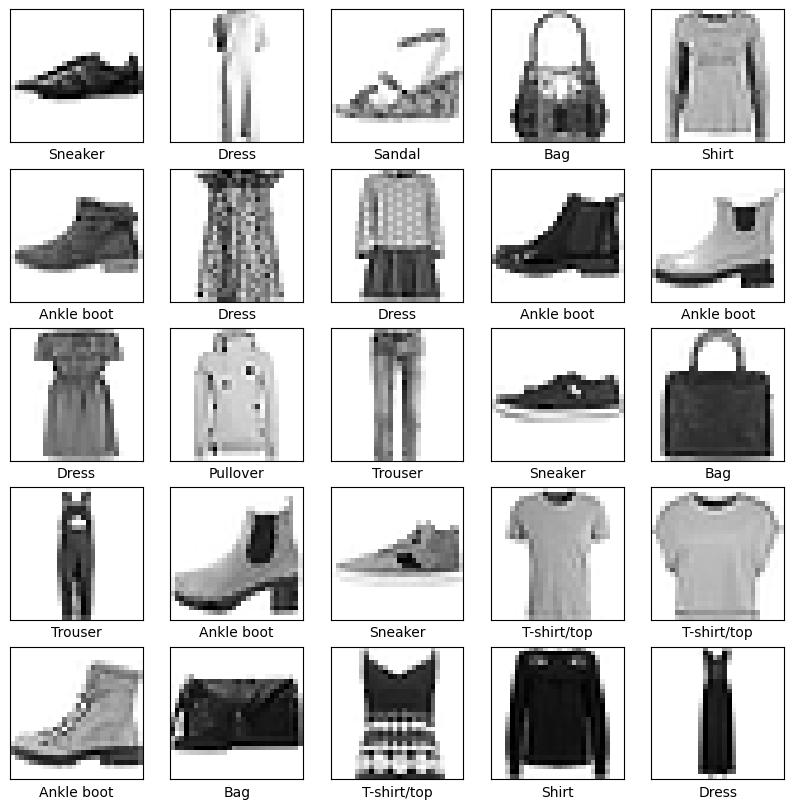

In [9]:
# ce code itère à travers les 25 premières images de x_train et les affiche dans une grille de 5 lignes et 5 colonnes. 
# Chaque image est accompagnée d'une étiquette correspondante provenant de la variable labels.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.show()

## Construction du modèle

### Mise en palce des couches

In [10]:
# Ce code crée un modèle de réseau neuronal séquentiel avec une couche d'aplatissement (Flatten) pour transformer 
# les données d'entrée en un vecteur 1D, une couche dense avec 128 neurones et une fonction d'activation ReLU, et une couche 
# dense de sortie avec 10 neurones correspondant aux classes de sortie.
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

### Paramétrage du mdoèle

In [11]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

### Compilation du modèle

In [12]:
# Ce code compile un modèle de réseau neuronal avec l'optimiseur Adam, la fonction de perte SparseCategoricalCrossentropy 
# et la métrique d'exactitude (accuracy). Une fois le modèle compilé, il est prêt à être entraîné sur les données 
# d'entraînement.
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Ajustement du modèle

In [13]:
# Ce code entraîne le modèle de réseau neuronal avec les images d'entraînement et leurs étiquettes correspondantes 
# pendant 10 époques. Cela permet d'ajuster les poids du modèle afin qu'il puisse apprendre à prédire correctement les 
# étiquettes des images.
model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5145 - accuracy: 0.8223 - val_loss: 0.4279 - val_accuracy: 0.8485
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3843 - accuracy: 0.8619 - val_loss: 0.4110 - val_accuracy: 0.8523
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3455 - accuracy: 0.8735 - val_loss: 0.3697 - val_accuracy: 0.8659
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3214 - accuracy: 0.8807 - val_loss: 0.3394 - val_accuracy: 0.8763
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3006 - accuracy: 0.8892 - val_loss: 0.3354 - val_accuracy: 0.8778
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2866 - accuracy: 0.8946 - val_loss: 0.3272 - val_accuracy: 0.8849
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2717 - accuracy: 0.9003 - val_loss: 0.3463 - val_accuracy:

### Evaluation du modèle sur le jeux de test

In [14]:
# Cette ligne évalue le modèle en utilisant les données de test x_test et les étiquettes correspondantes y_test.
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)
print(f'Perte: {loss}, Précision: {accuracy}')

313/313 - 1s - loss: 0.3516 - accuracy: 0.8793 - 569ms/epoch - 2ms/step
Perte: 0.3516436219215393, Précision: 0.8792999982833862


On constate un surapprentissage, le modèle est mauvais sur le jeu de test. Il à une précision plus faible par rapport à la précision sur le jeu d'entraînement.

### Faire des Predictions

In [15]:
# Ce code crée un nouveau modèle en ajoutant une couche de softmax à un modèle existant. Cela est utile pour obtenir 
# les probabilités de sortie du modèle pour chaque classe.
proba_model = Sequential([model, Softmax()])

# Cette ligne utilise le modèle précédent pour effectuer des prédictions sur l'ensemble de données x_test. 
# Une prédiction est un tableau de 10 nombres. Ils représentent la "confiance" du modèle que l'image correspond à chacun 
# des 10 vêtements différents.
predictions = proba_model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


#### Prédiction de la première image à l'index 0

In [16]:
predictions[0]

array([6.7620014e-08, 1.5387021e-09, 1.1876751e-09, 2.1472582e-08,
       1.6439596e-08, 2.1472012e-03, 1.7908706e-08, 6.3445396e-03,
       2.0956957e-06, 9.9150604e-01], dtype=float32)

In [17]:
pred_label = np.argmax(predictions[0])# Trouver l'index de la plus grande valeur dans le tableau predictions.
print(f"Le modèle prédit la première image comme étant ''{labels[pred_label]}''")
print(f"Et la classe prédite {pred_label} est {'bien égale' if pred_label == y_test[0] else 'différente'} "
      f"à la classe réelle {y_test[0]}")

Le modèle prédit la première image comme étant ''Ankle boot''
Et la classe prédite 9 est bien égale à la classe réelle 9


### Vérifications de quelques images

#### Fonction pour afficher une image

In [18]:
def plot_image(i, img, label, pred):
    """
    Affiche une image avec son étiquette rélle et prédites.
    Une couleur bleu indique une bonne prédiction et une couleur rouge une mauvaise prédiction.
    
    Parameters
    ----------
    i: int
        Indice de l'image
    img : np.array
        Tableau contenant les images elle-même
    label: np.array
        Tableau contenant les étiquettes réelles des images
    pred: np.array
        Tableau contenant les prédictions pour chaque classe des images
    """
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    pred_label = np.argmax(pred)
    color = np.where(pred_label == label, 'blue', 'red').item(0)
    
    plt.xlabel(f"{labels[pred_label]} {100*np.max(pred):2.0f}% ({labels[label]})", color=color)

#### Fonction pou afficher un diagramme à bar des 10 probabilités de prédiction correspondant à chaque classe

In [19]:
def plot_value_array(i, label, pred):
    """
    Affiche un graphique à barres représentant les prédictions de chaque classe pour une image donnée.
    Une couleur bleu indique une bonne prédiction et une couleur rouge une mauvaise prédiction.

    Parameters
    ----------
    i: int
        Indice de l'image
    label: np.array
        Etiquettes réelles de l'image
    pred: np.array
        Tableau contenant les prédictions pour chaque classe de l'image
    """
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plt.ylim([0, 1])
    bar = plt.bar(range(10), pred, color="#777777")
    pred_label = np.argmax(pred)
    bar[pred_label].set_color('red')
    bar[label].set_color('blue')

#### Première image indice 0

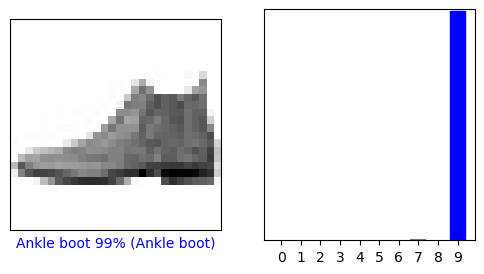

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, x_test[i], y_test[i], predictions[i])
plt.subplot(1,2,2)
plot_value_array(i, y_test[i], predictions[i])
plt.show()

#### 13 ème images d'indices 12

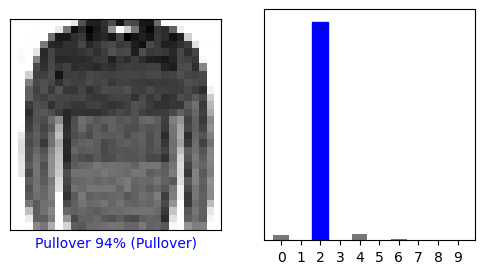

In [21]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, x_test[i], y_test[i], predictions[i])
plt.subplot(1,2,2)
plot_value_array(i, y_test[i], predictions[i])
plt.show()

#### Affichage des 15 premières images

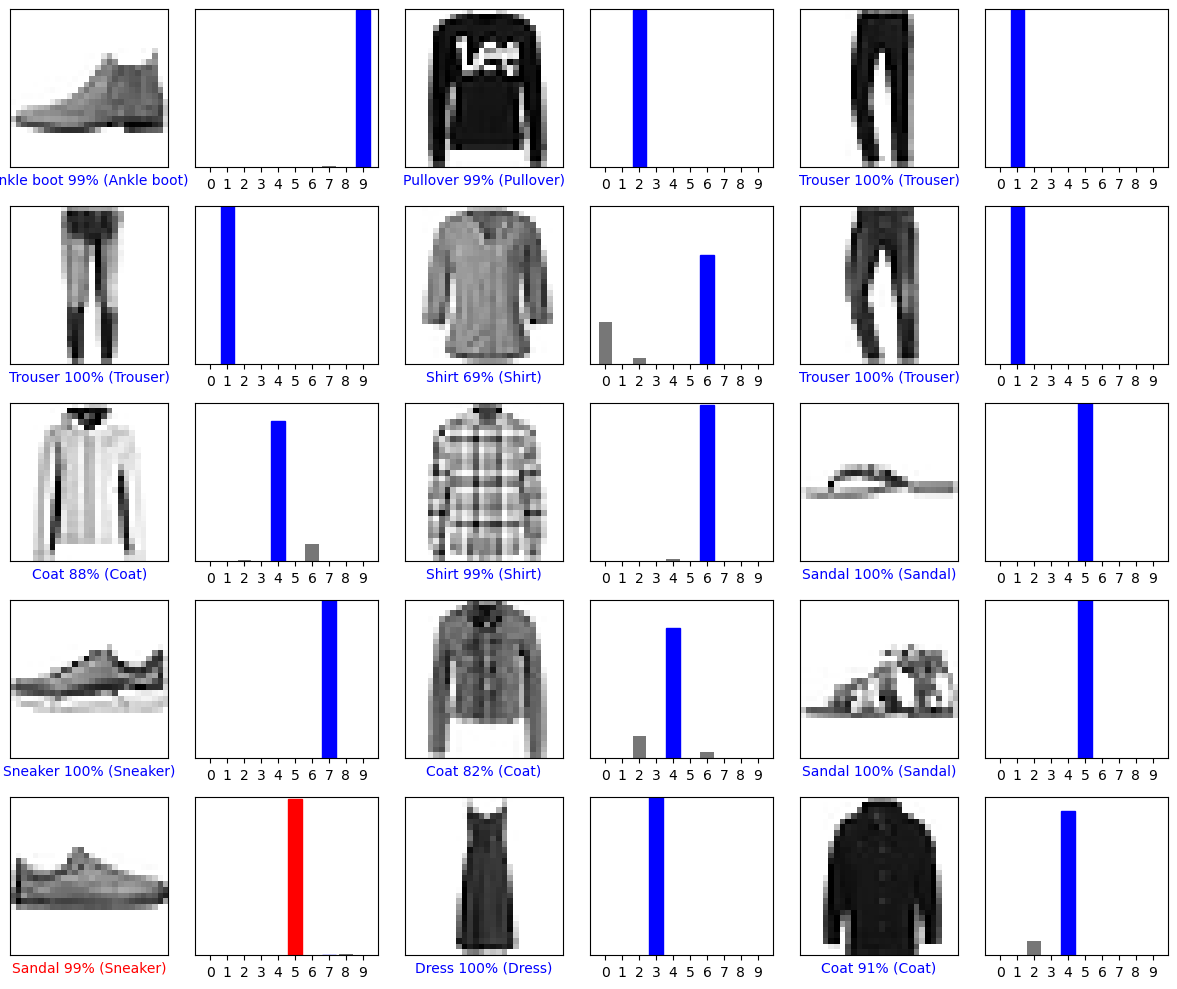

In [22]:
# Ce code affiche une grille de sous-graphiques contenant des images et des graphiques de valeurs associées à ces images. 

num_rows = 5 # Nombre de lignes de sous-graphiques
num_cols = 3 # Nombre de colonnes de sous-graphiques
num_images = num_rows*num_cols # Nombre total de sous-graphiques
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, x_test[i], y_test[i], predictions[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_test[i], predictions[i])
    
plt.tight_layout()
plt.show()

## Utiliser le modèle

### Extraction de l'image à l'index 1

In [23]:
img = x_test[1]
img.shape # La forme de l'image

(28, 28)

### Ajout de l'image img à un lot (batch)

In [24]:
# Ce code ajoute l'image img à un lot (batch). Il permet d'ajouter une dimension supplémentaire pour représenter le lot (batch).
# Cela est généralement nécessaire lorsqu'un modèle attend à recevoir des lots d'images plutôt qu'une seule image.
img = np.expand_dims(img,0)
print(img.shape)

(1, 28, 28)


### Prédiction de l'étiquette de l'image

In [25]:
pred_single = proba_model.predict(img)
pred_single

1/1 [==============================] - 0s 23ms/step


array([[2.8679695e-05, 1.1171974e-08, 9.9444109e-01, 9.2945953e-09,
        4.1628587e-03, 1.1219382e-15, 1.3673075e-03, 1.4262626e-19,
        1.4625400e-09, 6.0930655e-10]], dtype=float32)

### Affichage du resultat de la prédiction

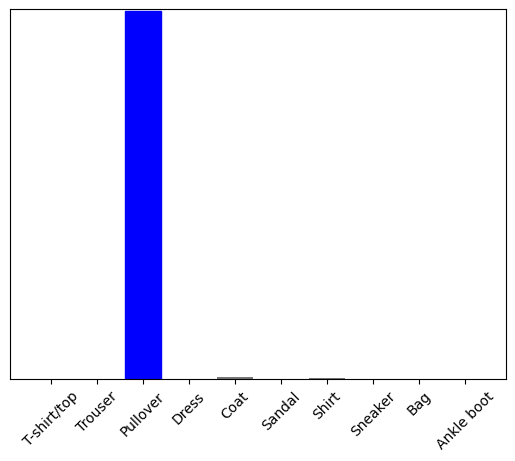

In [26]:
plot_value_array(1, y_test[1], pred_single[0])
plt.xticks(range(10), labels, rotation=45)
plt.show()

### Vérification des étiquettes

In [27]:
pred_label = np.argmax(pred_single[0])
print(f"La classe prédite {pred_label} est {'bien égale' if pred_label == y_test[1] else 'différente'} "
      f"à la classe réelle {y_test[1]}")

La classe prédite 2 est bien égale à la classe réelle 2


Le modèle fait une bonne prédiction

## Modification des paramètres du model

### Formation du modèle

In [28]:
# Construire le modèle CNN
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Entraîner le modèle
model2.fit(x_train, y_train, epochs=6, validation_data=(x_valid, y_valid), batch_size=32)

# Évaluer le modèle
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print('Accuracy:', test_acc2)

Epoch 1/6
1500/1500 [==============================] - 21s 13ms/step - loss: 0.4801 - accuracy: 0.8241 - val_loss: 0.3473 - val_accuracy: 0.8717
Epoch 2/6
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3184 - accuracy: 0.8842 - val_loss: 0.3081 - val_accuracy: 0.8878
Epoch 3/6
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2712 - accuracy: 0.8994 - val_loss: 0.2686 - val_accuracy: 0.9018
Epoch 4/6
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2357 - accuracy: 0.9105 - val_loss: 0.2685 - val_accuracy: 0.9014
Epoch 5/6
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2088 - accuracy: 0.9226 - val_loss: 0.2638 - val_accuracy: 0.9055
Epoch 6/6
313/313 [==============================] - 1s 4ms/step - loss: 0.2566 - accuracy: 0.9089
Accuracy: 0.9089000225067139


### Prédiction

In [29]:
# proba_model = Sequential([model, Softmax()])
predictions2 = model2.predict(x_test)

313/313 [==============================] - 1s 4ms/step


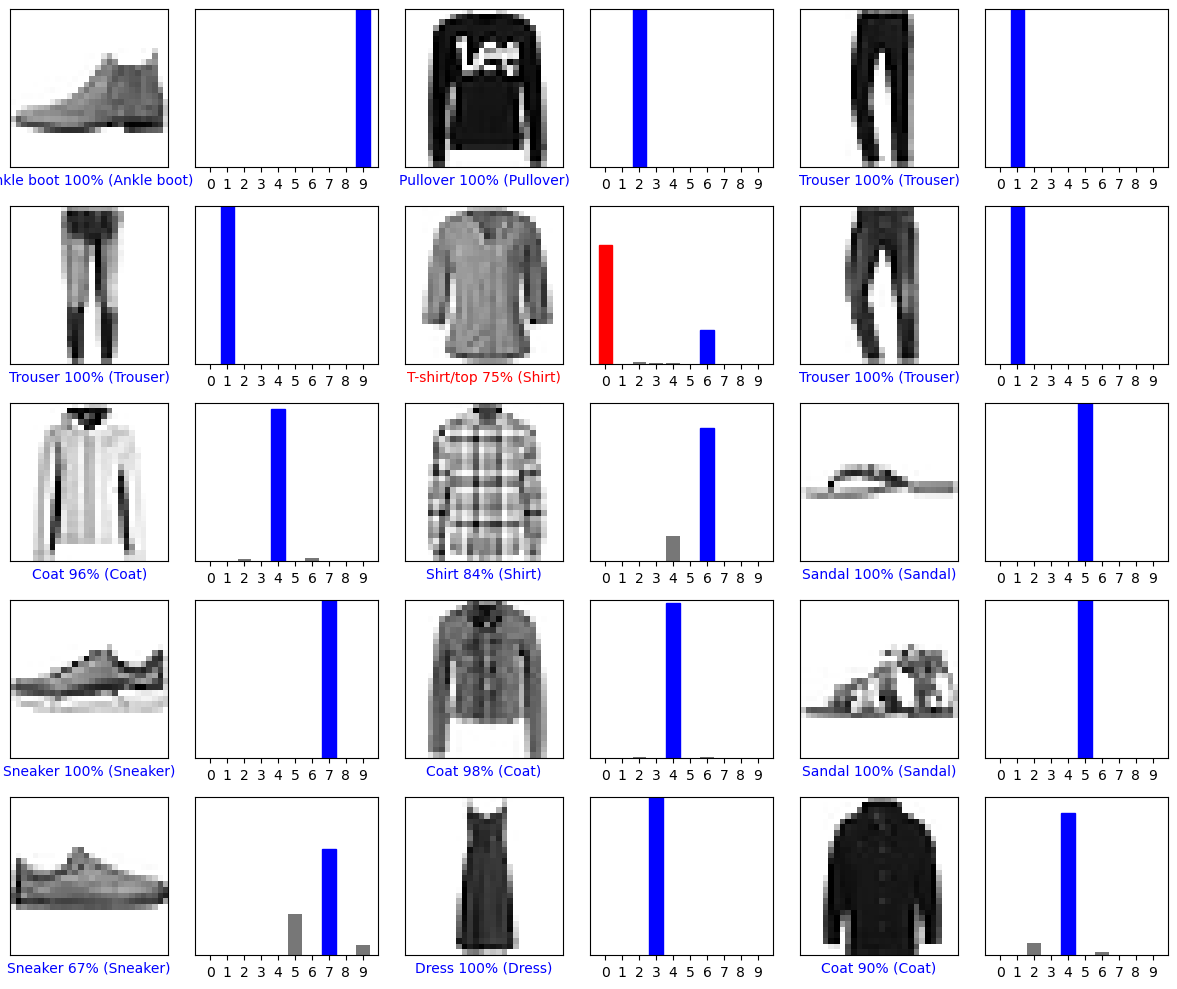

In [30]:
# Ce code affiche une grille de sous-graphiques contenant des images et des graphiques de valeurs associées à ces images. 

num_rows = 5 # Nombre de lignes de sous-graphiques
num_cols = 3 # Nombre de colonnes de sous-graphiques
num_images = num_rows*num_cols # Nombre total de sous-graphiques
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, x_test[i], y_test[i], predictions2[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_test[i], predictions2[i])
    
plt.tight_layout()
plt.show()

### Commentaire

Avec ce modèle 2, l'image en bas à droite est bien prédite avec un taux de réussite de 78 %, ce qui est une amélioration par rapport au modèle 1 qui avait un taux d'échec de prédiction de 87 %.

## Différence entre les deux modèles

Le deuxième modèle, appelé "model2", présente plusieurs améliorations par rapport au premier modèle. Voici les principales améliorations:

#### 1. Architecture du modèle:
Le deuxième modèle, "model2", utilise une architecture de réseau de neurones convolutifs (CNN) plus avancée par rapport au premier modèle. Les CNN sont particulièrement adaptés pour le traitement des images et sont capables de capturer des motifs et des caractéristiques importantes dans les données d'entrée.

Le modèle "model2" comprend les couches suivantes:
- Une couche de convolution avec 32 filtres de taille (3, 3) et une fonction d'activation ReLU.
- Une couche de pooling (MaxPooling2D) avec une fenêtre de taille (2, 2) pour réduire la dimensionnalité des données.
- Une deuxième couche de convolution avec 64 filtres de taille (3, 3) et une fonction d'activation ReLU.
- Une deuxième couche de pooling (MaxPooling2D) pour réduire davantage la dimensionnalité des données.
- Une couche d'aplatissement (Flatten) pour convertir les données en un vecteur unidimensionnel.
- Une couche dense avec 128 neurones et une fonction d'activation ReLU.
- Une couche de sortie dense avec 10 neurones et une fonction d'activation softmax pour la classification des classes.

#### 2. Prétraitement des données:
Le deuxième modèle utilise des données d'entrée au format différent par rapport au premier modèle. Les données d'entrée pour le modèle "model2" sont des images en niveaux de gris de taille (28, 28, 1), tandis que le premier modèle utilise des images en niveaux de gris de taille (28, 28).

#### 3. Fonction de perte et métriques:
Le deuxième modèle utilise la fonction de perte "sparse_categorical_crossentropy" pour calculer l'erreur entre les prédictions du modèle et les étiquettes réelles. Cette fonction de perte est couramment utilisée pour les problèmes de classification avec plusieurs classes.

Le modèle "model2" utilise également la métrique "accuracy" pour évaluer les performances du modèle pendant l'entraînement.

#### 4. Optimiseur et taux d'apprentissage:
Le deuxième modèle utilise l'optimiseur Adam avec un taux d'apprentissage de 0.001. L'optimiseur Adam est un algorithme d'optimisation populaire qui adapte le taux d'apprentissage en fonction des gradients calculés lors de l'entraînement.

#### 5. Entraînement du modèle:
Le deuxième modèle est entraîné pendant 6 époques avec un batch size de 32. L'entraînement du modèle se fait en utilisant les données d'entraînement (x_train, y_train) et les données de validation (x_valid, y_valid).

Ces améliorations dans le deuxième modèle, telles que l'utilisation de couches convolutives, une architecture plus complexe et un prétraitement des données adapté, permettent d'obtenir de meilleures performances de classification par rapport au premier modèle.